In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Step 1: Combine the individual datasets
df_a = pd.read_csv('a.csv')
df_b = pd.read_csv('b.csv')
df_c = pd.read_csv('c.csv')
df_d = pd.read_csv('d.csv')
df_e = pd.read_csv('e.csv')

# Add labels for each dataset
df_a['letter'] = 'A'
df_b['letter'] = 'B'
df_c['letter'] = 'C'
df_d['letter'] = 'D'
df_e['letter'] = 'E'

df = pd.concat([df_a, df_b, df_c, df_d, df_e])

# Step 2: Feature engineering
features = ['Flex1', 'Flex2', 'Flex3', 'Flex4', 'Flex5', 'Accel X', 'Accel Y', 'Accel Z']
X = df[features]

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['letter'])

# Step 3: Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Training
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 5: Evaluation
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print('Accuracy:', accuracy)


2024-12-14 04:41:37.770511: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 04:41:37.781752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734151297.794792   13630 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734151297.798548   13630 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 04:41:37.811536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/50


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-14 04:41:39.274866: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4115 - loss: 1.4190 
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.8642
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9345 - loss: 0.5240 
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9527 - loss: 0.3338 
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9652 - loss: 0.2185 
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9806 - loss: 0.1220 
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9809 - loss: 0.1122 
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0805 
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0740 
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0621 
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9927 - loss: 0.0441 
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - los

In [3]:
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print('Accuracy:', accuracy)

Accuracy: 1.0


In [5]:
# Step 6: Save the model
model.save('FNNtrained_model.keras')


In [29]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 1219
Test set size: 305


In [30]:
overlap = set(map(tuple, X_train)) & set(map(tuple, X_test))
print("Number of overlapping rows between train and test:", len(overlap))


Number of overlapping rows between train and test: 0


In [31]:
print("Class distribution in training set:", pd.Series(y_train).value_counts())
print("Class distribution in test set:", pd.Series(y_test).value_counts())


Class distribution in training set: 2    257
1    253
0    243
4    239
3    227
Name: count, dtype: int64
Class distribution in test set: 3    87
2    61
1    61
0    52
4    44
Name: count, dtype: int64


In [32]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Predicted classes:", y_pred[:10])
print("Actual classes:", y_test[:10])


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicted classes: [2 0 3 4 2 3 2 4 3 3]
Actual classes: [2 0 3 4 2 3 2 4 3 3]


In [33]:
# Check a few predictions
print("Predicted classes:", y_pred[:10].flatten())
print("Actual classes:", y_test[:10])

# Check if all predictions are identical
unique_predictions = np.unique(y_pred)
print(f"Unique predictions: {unique_predictions}")


Predicted classes: [2 0 3 4 2 3 2 4 3 3]
Actual classes: [2 0 3 4 2 3 2 4 3 3]
Unique predictions: [0 1 2 3 4]


In [34]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        52
           B       1.00      1.00      1.00        61
           C       1.00      1.00      1.00        61
           D       1.00      1.00      1.00        87
           E       1.00      1.00      1.00        44

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305



Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.7569e-04 - val_accuracy: 1.0000 - val_loss: 9.0427e-04
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.7235e-04 - val_accuracy: 1.0000 - val_loss: 9.1575e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0245e-04 - val_accuracy: 1.0000 - val_loss: 8.8655e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.6595e-04 - val_accuracy: 1.0000 - val_loss: 8.9089e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.2525e-04 - val_accuracy: 1.0000 - val_loss: 8.4545e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.3854e-04 - val_accuracy: 1.0000 - val_loss: 8.5668e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.6672e-04 - val_accuracy: 1.0000 - val_loss: 8.3119e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

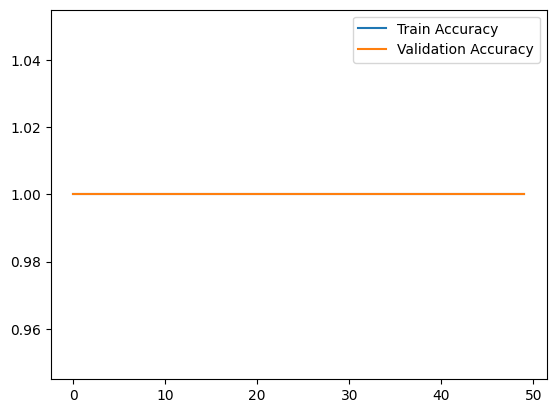

In [35]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [6]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('FNNtrained_model.keras')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa1qkm7hy/assets


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
INFO:tensorflow:Assets written to: /tmp/tmpa1qkm7hy/assets


Saved artifact at '/tmp/tmpa1qkm7hy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140571082973856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571082978432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083033584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083038512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083043792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083044496: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734151746.478845   13630 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734151746.479152   13630 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-14 04:49:06.480414: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpa1qkm7hy
2024-12-14 04:49:06.480788: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-14 04:49:06.480796: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpa1qkm7hy
I0000 00:00:1734151746.483714   13630 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-14 04:49:06.484376: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-14 04:49:06.507598: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpa1qkm7hy
2024-12-14 04:49:06.513080: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [7]:
# Apply quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quant = converter.convert()

# Save the quantized TensorFlow Lite model
with open('model_quant.tflite', 'wb') as f:
    f.write(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmp9kesti31/assets


INFO:tensorflow:Assets written to: /tmp/tmp9kesti31/assets


Saved artifact at '/tmp/tmp9kesti31'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140571082973856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571082978432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083033584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083038512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083043792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140571083044496: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734151805.932531   13630 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734151805.932560   13630 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-14 04:50:05.932722: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp9kesti31
2024-12-14 04:50:05.933133: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-14 04:50:05.933141: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp9kesti31
2024-12-14 04:50:05.936146: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-14 04:50:05.954717: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp9kesti31
2024-12-14 04:50:05.961046: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 28329 microseconds.
